# CS145: Project 2 | Exploring the Relationship Between Socioeconomic Status and Crime Rate in the US

## Collaborators:
Please list the names and SUNet IDs of your collaborators below:
* *Hannah Lee, hhannah*

## Project Overview

---

In this project, I am exploring the question: **"What is the correlation between socioeconomic status and crime rate in the US?"**

To measure the socioeconomic status, I plan on using the Area Deprivation Index, which is the most heavily independently validated metric for measuring US neighborhood-level disadvantage. The ADI takes into account public data relating to income, education, employment, and housing quality to measure the socioeconomic status of communities. More specifically, the ADI ranks neighborhoods against both the nation and the state in which the neighborhood is located within — a higher ADI percentage indicates that the given neighborhood is more economically disadvantaged than "X percent" of other regions. In other words, the higher the ADI percentile, the greater the economic disadvantage.

Additionally, keeping socioeconomic status as an overarching topic, I plan on exploring how different factors individually contribute to crime rate in the US.

The demographical factors I will focus on are as follows:
- Median income
- Percentage of population with high school diploma
- Percentage of population with bachelor's degree

Given that BigQuery only provides public datasets on crime for the states of Austin and Chicago, I will using a dataset from the Federal Bureau Investigation for the purposes of this project, with the objective of examining the relationship between crime rate and socioeconomic status by zipcode. I acknowledge that this does not paint a complete picture of the correlation between socioeconomic status and crime rate in the US, but still hope to explore any trends that appear.

---


## Analysis of Dataset

---

### Dataset Overview
The following datasets will be used in this project:
- `crime` (4.52 MB): Information about crime totals for cities across the US in 2022, as well as supplementary tables for mapping zipcodes to their corresponding FIPS codes and population densities
- `broadstreet_adi` (654 KB): Information about the Area Deprivation Index in counties across the US
- `census_bureau_acs` (3.0 GB): Information about populations across the US, including family income, education level, and racial distribution.


Total Dataset Size: ~ 3 GB  

----

---

### `crime`

#### Overview
This dataset contains information about crime across US cities by offense type. The data is sourced from the Federal Bureau of Investigation. The FBI provides this data as one table per state, per year. For simplicity, I copied and pasted the 2022 data for all states into one master file. Because this data does not include the zipcode for each city, I wrote a Python script to add the associated zipcode for each city.

Additionally, this dataset contains information about the FIPS code for each zipcode in the US. This data is sourced from Kaggle, which itself uses data from the United States Department of Housing and Urban Development (HUDS), as well as the annual US census.

#### Tables
There are two tables in this dataset:
- `crime_by_zip` - Information about total offenses, crimes against persons, crimes against property, and crimes against society for each city in the US
- `pop_density` - Information about the population density (population / area) for each zipcode
- `zipcode_fips` - Information about each zipcode, including its state, city, and FIPS code

#### Crime
The columns I plan on focusing on are as follows:
- `state` (string) - The state in which the crime occurred
- `city` (string) - The city in which the crime occurred
- `population` (integer) - The number of inhabitants of the city
- `total_offenses` (integer) - The total number of offenses that occurred
- `crimes_against_persons` (integer) - The total number of crimes against persons
- `crimes_against_property` (integer) - The total number of crimes against property
- `crimes_against_society` (integer) - The total number of crimes against society
- `zipcode` (integer) - The zipcode corresponding to the city in which the crime occurred

#### Population Density
The columns I plan on focusing on are as follows:
- `zipcode` (integer) - The zipcode that will be the basis for information in subsequent columns
- `density` (float) - The corresponding population density for the zipcode

#### Zipcode FIPS
The columns I plan on focusing on are as follows:
- `ZIP` (integer) - The zipcode that will be the basis for information in subsequent columns
- `STCOUNTYFP` (integer) - The corresponding FIPS code for the zipcode


#### Additional Information
After reviewing the dataset produced by my Python script, I noticed that there were numerous rows with "N/A" as the zipcode. This is due to the fact that for some cities, there are multiple zipcodes. There were approximately 1,000 rows that had "N/A" as zipcode. While I could have gone in and manually updated each row, I decided against this option as it appeared to be incredibly inefficient. Additionally, I tried using the first zipcode, but the dataset I was using to map zipcodes to cities/states simply did not contain zipcode information for cities with multiple zipcodes (as opposed to storing an array of all possible zipcodes). Therefore, I did not take any separate action to modify the rows with a "N/A" zipcode value. Even without the 1,000 rows, I believe I have enough data to analyze.

----

---

### `broadstreet_adi`

#### Overview
The Broadstreet ADI dataset contains information about the Area Deprivation Index (ADI) in counties across the US. ADI measures the social and economic status for neighborhoods using various factors including median family income, high school graduation rate, and income disparity. The ADI is measured as a percentile between 0 and 100, where the ADI for one neighborhood represents the percentage of other neighborhoods the neighborhood is *more* disadvantaged than.

#### Tables
`broadstreet_adi` contains the following tables:
- `area_deprivation_index_by_census_block_group`
- `area_deprivation_index_by_county`
- `area_deprivation_index_by_zipcode`

While all three tables present information about the ADI for different regions, each table focuses uses a different geographic scale. On average, census block groups represents a smaller number of people than zipcodes, which represent fewer individuals than counties.

#### Area Deprivation Index by Zipcode
The columns I plan on focusing on are as follows:
- `zipcode` (string): The zipcode corresponding to the city in which the crime occurred
- `year` (integer): The year in which the ADI was measured
- `area_deprivation_index_percent` (float): The ADI percentile for the zipcode  

#### Additional Information
After switching to use zipcode, I ran into the challenge of not having a `county_fips_code` column (which is available in the `area_deprivation_index_by_county` table, but not the `area_deprivation_index_by_zipcode` table). The `county_fips_code` column contains the five digit code that uniquely identifies the county, and is identical to the `geo_id` present in the Census dataset. Without this column, I realized that I have no variable on which to join the table containing information about ADI percentiles with the Census table. I considered joining the `area_deprivation_index_by_county` table with the `area_deprivation_index_by_zipcode` table, as they both contain the column `geo_id`, but the data appears to be completely different for the two tables (and therefore have no overlap). It is for this reason that I introduced the `zipcode_fips` table above.

----

---

### `census_bureau_acs`

#### Overview
The Census dataset contains information about populations across the US, including family income, education level, and racial distribution.

#### Tables
This dataset contains numerous tables differing on the following variables:
- Geographic breakdown: how the US is divide into geographical regions (ex: by block group vs by county)
- Time period: the number of years described in the table (ex: 1 year data vs 5 year data)
- Year: the year in which the census was taken

For the purposes of my project, I will be using the most recent 5-year census data by county, `county_2020_5yr`.

Important to note is that as briefly described above, the `county_2020_5yr` contains a column `geo_id`, which is equivalent to the FIPS code present in the `zipcode_fips` and `area_deprivation_index_by_zipcode` tables.


### 5-Year Census Data by County from 2016-2020
The columns I plan on focusing on are as follows:
- `geo_id` (string): The five digit code that uniquely identifies the county (same as county_fips_code)
- `bachelors_degree` (float): The count of individuals who have obtained a bachelor's degree
- `high_school_diploma` (float): The count of individuals who have attained a high school diploma
- `median_income` (float): The median household income in the county

### Additional Information
While there are numerous other columns in this table, I was cautious about using these columns due to the fact that associating other demographic features — those related to race and ethnicity, in particular — with the concept of crime, which is generally condemned by society.


----


## Data Exploration

In [ ]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "cs145-403121"

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Preview of Data
*This section just gives us a very basic preview of the underlying data in our tables, for easy future reference.*

In [ ]:
# crime_by_zip
%%bigquery --project $project_id

SELECT *
FROM `cs145-403121.crime.crime_by_zip`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,state,city,population,total_offenses,crimes_against_persons,crimes_against_property,crimes_against_society,zipcode
0,Alabama,Abbeville,2390,301,96,76,129,36310
1,Alabama,Adamsville,4233,528,72,332,124,35005
2,Alabama,Alabaster,33974,1524,293,979,252,35007
3,Alabama,Alexander City,14476,1834,696,816,322,35010
4,Alabama,Anniston,21007,2825,991,1569,265,36201


In [ ]:
# population_density
%%bigquery --project $project_id

SELECT *
FROM `cs145-403121.crime.pop_density`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,zipcode,population,density,city,state,state_abv,city_state,county,country,coordinates,lat,long
0,96960,46,709.4,Marshall Islands,None,MH,"Marshall Islands,MH",Marshall Islands,US,"7.1128, 171.237",7.1128,171.2370
1,96970,46,709.4,Ebeye,None,MH,"Ebeye,MH",Marshall Islands,US,"8.786, 167.7365",8.7860,167.7365
2,52210,708,7.7,Brandon,Iowa,IA,"Brandon,IA",Buchanan,US,"42.3309, -92.0059",42.3309,-92.0059
3,52326,565,104.0,Quasqueton,Iowa,IA,"Quasqueton,IA",Buchanan,US,"42.3956, -91.7679",42.3956,-91.7679
4,52329,895,6.1,Rowley,Iowa,IA,"Rowley,IA",Buchanan,US,"42.37, -91.8441",42.3700,-91.8441


In [ ]:
# zipcode_fips
%%bigquery --project $project_id

SELECT *
FROM `cs145-403121.crime.zipcode_fips`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,21229,Baltimore city,MD,24510,C7
1,21230,Baltimore city,MD,24510,C7
2,21223,Baltimore city,MD,24510,C7
3,21233,Baltimore city,MD,24510,C7
4,21278,Baltimore city,MD,24510,C7


In [ ]:
# broadstreet_adi
%%bigquery --project $project_id

SELECT *
FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_census_block_group`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,geo_id,state_fips_code,county_fips_code,block_group_fips_code,description,county_name,state_name,state,year,area_deprivation_index_percent
0,15000US010010201001,01,01001,010010201001,"Block Group 1, Census Tract 201",Autauga County,Alabama,AL,2018,79.0
1,15000US010010201002,01,01001,010010201002,"Block Group 2, Census Tract 201",Autauga County,Alabama,AL,2018,30.0
2,15000US010010202001,01,01001,010010202001,"Block Group 1, Census Tract 202",Autauga County,Alabama,AL,2018,76.0
3,15000US010010202002,01,01001,010010202002,"Block Group 2, Census Tract 202",Autauga County,Alabama,AL,2018,66.0
4,15000US010010203001,01,01001,010010203001,"Block Group 1, Census Tract 203",Autauga County,Alabama,AL,2018,42.0


In [ ]:
# census_bureau_acs
%%bigquery --project $project_id

SELECT *
FROM `bigquery-public-data.census_bureau_acs.county_2020_5yr`
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,geo_id,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,...,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,walked_to_work,white_including_hispanic,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over
0,1037,106775.0,32.0,23.0,26.0,0.0,0.0,0.0,0.0,578.0,...,2599.0,29.0,102.0,63.0,7052.0,523.0,677.0,6924.0,269.0,4077.0
1,1063,73125.0,38.0,38.0,0.0,0.0,0.0,0.0,0.0,481.0,...,1953.0,5.0,13.0,17.0,1430.0,51.0,144.0,1418.0,86.0,2270.0
2,5025,96195.0,23.0,23.0,7.0,0.0,0.0,0.0,0.0,395.0,...,953.0,21.0,18.0,76.0,6807.0,477.0,510.0,6807.0,121.0,3063.0
3,5039,63680.0,36.0,36.0,29.0,0.0,0.0,0.0,0.0,382.0,...,1354.0,174.0,136.0,55.0,3834.0,226.0,294.0,3760.0,15.0,2773.0
4,5053,219500.0,20.0,17.0,6.0,0.0,0.0,0.0,0.0,850.0,...,1000.0,140.0,117.0,65.0,17122.0,1147.0,1189.0,16850.0,509.0,7942.0


### Relationship Between ADI and Crimes by Zipcode

In [ ]:
%%bigquery --project $project_id

SELECT
  c.state,
  c.city,
  c.zipcode,
  (c.total_offenses / c.population) as rate_offenses,
  (c.crimes_against_persons / c.population) as rate_persons,
  (c.crimes_against_property / c.population) as rate_property,
  (c.crimes_against_society / c.population) as rate_society,
  a.area_deprivation_index_percent as adi
FROM
  `cs145-403121.crime.crime_by_zip` c
JOIN
  `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
ON
  c.zipcode = a.zipcode
WHERE
  a.year = 2020 AND a.area_deprivation_index_percent > 0
GROUP BY
  c.state,
  c.city,
  c.zipcode,
  c.total_offenses,
  c.crimes_against_persons,
  c.crimes_against_property,
  c.crimes_against_society,
  c.population,
  a.area_deprivation_index_percent
ORDER BY
  rate_property

Query is running:   0%|          |

Downloading:   0%|          |

,state,city,zipcode,rate_offenses,rate_persons,rate_property,rate_society,adi
0,Alabama,Greensboro,36744,0.000000,0.000000,0.000000,0.000000,94.0
1,Alabama,Hillsboro,35643,0.002451,0.002451,0.000000,0.000000,74.0
2,Alabama,Lockhart,36455,0.000000,0.000000,0.000000,0.000000,75.0
3,Alabama,Pennington,36916,0.000000,0.000000,0.000000,0.000000,88.0
4,Alabama,Sweet Water,36782,0.000000,0.000000,0.000000,0.000000,84.0
...,...,...,...,...,...,...,...,...
5572,Delaware,Rehoboth Beach,19971,0.282353,0.058824,0.181513,0.042017,10.0
5573,California,Emeryville,94608,0.223770,0.023159,0.192160,0.008450,19.0
5574,Texas,South Padre Island,78597,0.395508,0.106934,0.199707,0.088867,25.0
5575,Ohio,Holland,43145,0.272677,0.023372,0.233723,0.015582,56.0


In [ ]:
df = _

#### Criminal Offenses

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


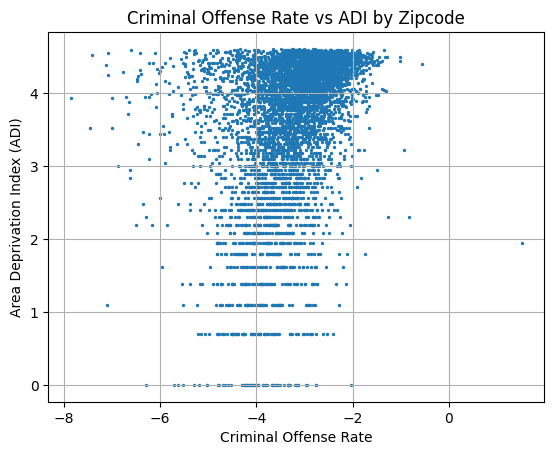

In [ ]:
plt.scatter(np.log(df['rate_offenses']), np.log(df['adi']), s=2)
plt.title('Criminal Offense Rate vs ADI by Zipcode')
plt.xlabel('Criminal Offense Rate')
plt.ylabel('Area Deprivation Index (ADI)')
plt.grid(True)
plt.show()

#### Crimes Against Persons

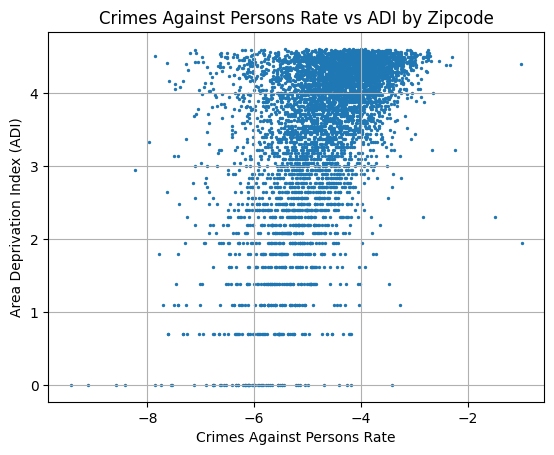

In [ ]:
plt.scatter(np.log(df['rate_persons']), np.log(df['adi']), s=2)
plt.title('Crimes Against Persons Rate vs ADI by Zipcode')
plt.xlabel('Crimes Against Persons Rate')
plt.ylabel('Area Deprivation Index (ADI)')
plt.grid(True)
plt.show()

#### Crimes Against Property

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


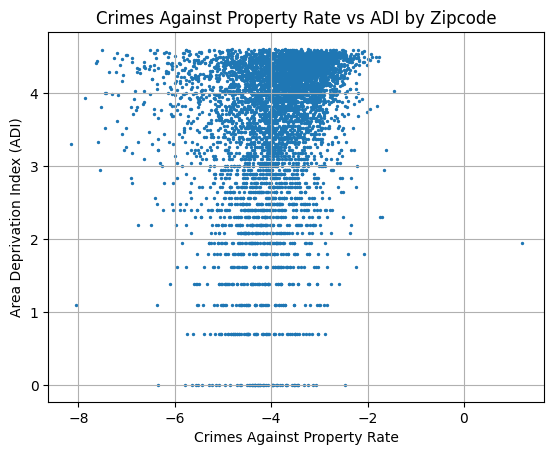

In [ ]:
plt.scatter(np.log(df['rate_property']), np.log(df['adi']), s=2)
plt.title('Crimes Against Property Rate vs ADI by Zipcode')
plt.xlabel('Crimes Against Property Rate')
plt.ylabel('Area Deprivation Index (ADI)')
plt.grid(True)
plt.show()

#### Crimes Against Society

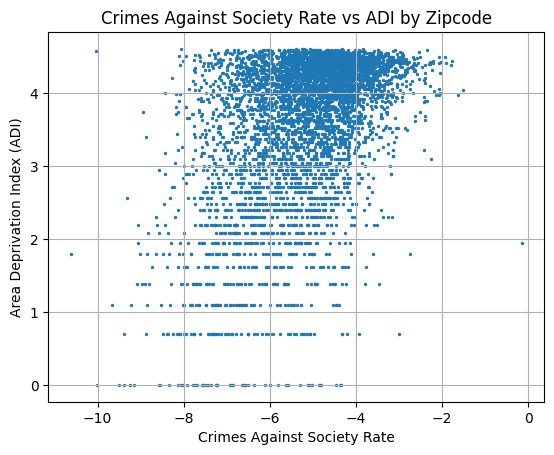

In [ ]:
plt.scatter(np.log(df['rate_society']), np.log(df['adi']), s=2)
plt.title('Crimes Against Society Rate vs ADI by Zipcode')
plt.xlabel('Crimes Against Society Rate')
plt.ylabel('Area Deprivation Index (ADI)')
plt.grid(True)
plt.show()

#### Analysis of Results

In order to examine the relationship between ADI and crime, I divided crime into four subsets (as provided by the columns in the `crime_zipcode` table):
- Criminal offenses - Total number of criminal offenses for the zipcode
- Crimes against persons - Total number of crimes in which the victims are always individuals (ex: murder, rape, assault)
- Crimes against property - Total number of crimes in which the objective is to obtain money, property, or some other benefit (ex: robbery, bribery, burglary)
- Crimes against society - Total number of crimes representing typically victimless incidents involving engagement in certain types of illegal activity (ex: gambling, prostitution, drug violations)

For each demographic factor I evaluate in this project, I will use the four subsets of crime described above.

Upon examining the plots for ADI vs criminal offenses, crimes against persons, crimes against property, and crimes against society, there does not seem to be a significant correlation between ADI and crime rate at first glance.

For criminal offenses and crimes against property, in particular, there appears to be very little correlation. For crimes against persons and crimes against society, on the other hand, there does seem to be a slight positive correlation — indicating that as the ADI percentile increases, the crime rate also increases.

The fact that there is little correlation between ADI and criminal offenses and crimes against property suggests that overall, ADI does not have a significant impact on the rate of crime. However, ADI may influence the crime rate for specific types of crimes. Crimes against persons and crimes against society are typically categorized as more "extreme" and high risk than crimes against society. This may suggest that ADI has some correlation but only for more severe crimes, although we must further evaluate to establish a more concrete relationship.

### Relationship Between Median Income and Crimes by Zipcode

In [ ]:
%%bigquery --project $project_id

WITH adi_fips AS (
  SELECT
    a.zipcode,
    a.year,
    a.area_deprivation_index_percent,
    CAST(f.STCOUNTYFP as STRING) as fips,
  FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
  JOIN `cs145-403121.crime.zipcode_fips` f
  ON a.zipcode = CAST(f.ZIP as STRING)
), median_income AS (
  SELECT
    a.zipcode,
    AVG(c.median_income) AS avg_median_income,
  FROM
    adi_fips a
  JOIN
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  ON
    a.fips = c.geo_id
  WHERE
    a.year = 2020
    AND a.area_deprivation_index_percent > 0
    AND c.median_income > 0
  GROUP BY a.zipcode
)

SELECT
  c.state,
  c.city,
  c.zipcode,
  (c.total_offenses / c.population) as rate_offenses,
  (c.crimes_against_persons / c.population) as rate_persons,
  (c.crimes_against_property / c.population) as rate_property,
  (c.crimes_against_society / c.population) as rate_society,
  m.avg_median_income
FROM `cs145-403121.crime.crime_by_zip` c
JOIN median_income m
ON c.zipcode = m.zipcode
GROUP BY
  c.state,
  c.city,
  c.zipcode,
  c.total_offenses,
  c.crimes_against_persons,
  c.crimes_against_property,
  c.crimes_against_society,
  c.population,
  m.avg_median_income
ORDER BY c.total_offenses

Query is running:   0%|          |

Downloading:   0%|          |

,state,city,zipcode,rate_offenses,rate_persons,rate_property,rate_society,avg_median_income
0,Virginia,White Stone,22578,0.000000,0.000000,0.000000,0.000000,59736.000000
1,Virginia,Eastville,23347,0.000000,0.000000,0.000000,0.000000,50819.000000
2,South Carolina,Coward,29530,0.000000,0.000000,0.000000,0.000000,49645.000000
3,Georgia,Kingston,30145,0.000000,0.000000,0.000000,0.000000,55941.500000
4,Georgia,Bartow,30413,0.000000,0.000000,0.000000,0.000000,38610.666667
...,...,...,...,...,...,...,...,...
4797,Michigan,Detroit,48201,0.132905,0.046007,0.079356,0.007542,49359.000000
4798,Texas,Dallas,75065,0.083213,0.022213,0.051000,0.010001,90354.000000
4799,Pennsylvania,Philadelphia,17959,0.097841,0.023076,0.067731,0.007034,53703.000000
4800,Texas,San Antonio,78201,0.105360,0.025273,0.071492,0.008595,58288.000000


In [ ]:
df = _

#### Criminal Offenses

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


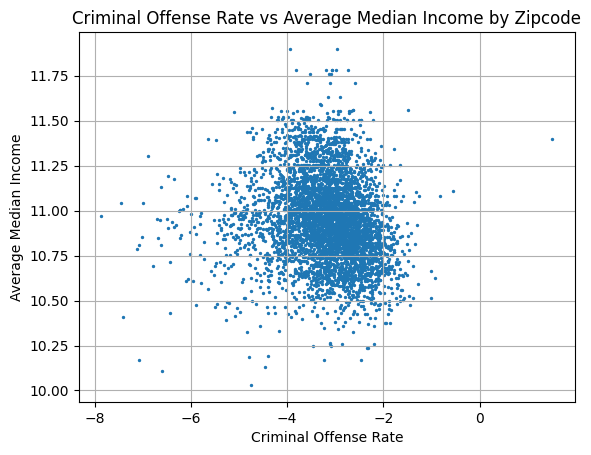

In [ ]:
plt.scatter(np.log(df['rate_offenses']), np.log(df['avg_median_income']), s=2)
plt.title('Criminal Offense Rate vs Average Median Income by Zipcode')
plt.xlabel('Criminal Offense Rate')
plt.ylabel('Average Median Income')
plt.grid(True)
plt.show()

#### Crimes Against Persons

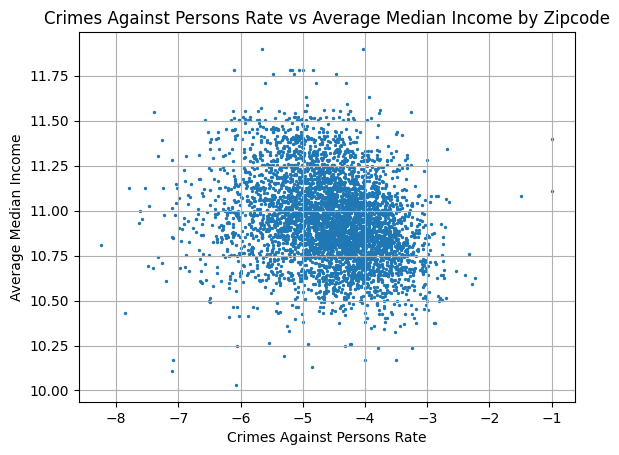

In [ ]:
plt.scatter(np.log(df['rate_persons']), np.log(df['avg_median_income']), s=2)
plt.title('Crimes Against Persons Rate vs Average Median Income by Zipcode')
plt.xlabel('Crimes Against Persons Rate')
plt.ylabel('Average Median Income')
plt.grid(True)
plt.show()

#### Crimes Against Property

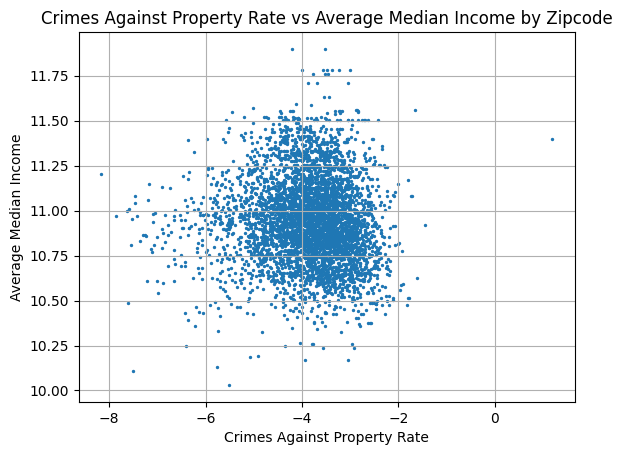

In [ ]:
plt.scatter(np.log(df['rate_property']), np.log(df['avg_median_income']), s=2)
plt.title('Crimes Against Property Rate vs Average Median Income by Zipcode')
plt.xlabel('Crimes Against Property Rate')
plt.ylabel('Average Median Income')
plt.grid(True)
plt.show()

#### Crimes Against Society

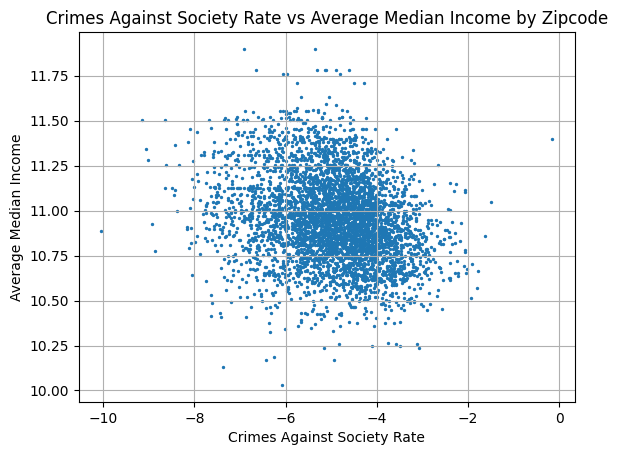

In [ ]:
plt.scatter(np.log(df['rate_society']), np.log(df['avg_median_income']), s=2)
plt.title('Crimes Against Society Rate vs Average Median Income by Zipcode')
plt.xlabel('Crimes Against Society Rate')
plt.ylabel('Average Median Income')
plt.grid(True)
plt.show()

#### Analysis of Results
The four plots I created displayed an interesting relationship between median income and crimes by zipcode. The first interesting observation was that once again, there was no significant correlation between median income and criminal offenses / crimes against property. Following the same reasoning as above, it is my hypothesis that the reasoning for this is that crimes against property typically has a much lesser degree of severity than crimes against persons or crimes against society.

Additionally, I found that there is a slightly negative relationship between median income and crimes against persons, as well as median income and crimes against society. This aligns with my initial assumption that neighborhoods with a generally wealthier population will have a lower rate of crime, as higher median income tends to be correlated with a higher level of education and higher rates of employment within a community.

However, this data is not conclusive, as median income does not necessarily seem to be perfectly correlated with crime rate, from personal observations. For example, although San Francisco has a high median income, it also has a disproportionally high crime rate.

### Relationship Between High School Graduation Rate and Crimes by Zipcode

In [ ]:
%%bigquery --project $project_id

WITH adi_fips AS (
  SELECT
    a.zipcode,
    a.year,
    a.area_deprivation_index_percent,
    CAST(f.STCOUNTYFP as STRING) as fips,
  FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
  JOIN `cs145-403121.crime.zipcode_fips` f
  ON a.zipcode = CAST(f.ZIP as STRING)
), high_school_grad AS (
  SELECT
    a.zipcode,
    AVG(c.high_school_diploma) AS avg_high_school_grad,
  FROM
    adi_fips a
  JOIN
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  ON
    a.fips = c.geo_id
  WHERE
    a.year = 2020
    AND a.area_deprivation_index_percent > 0
    AND c.high_school_diploma > 0
  GROUP BY a.zipcode
)

SELECT
  c.state,
  c.city,
  c.zipcode,
  (c.total_offenses / c.population) as rate_offenses,
  (c.crimes_against_persons / c.population) as rate_persons,
  (c.crimes_against_property / c.population) as rate_property,
  (c.crimes_against_society / c.population) as rate_society,
  h.avg_high_school_grad
FROM `cs145-403121.crime.crime_by_zip` c
JOIN high_school_grad h
ON c.zipcode = h.zipcode
GROUP BY
  c.state,
  c.city,
  c.zipcode,
  c.total_offenses,
  c.crimes_against_persons,
  c.crimes_against_property,
  c.crimes_against_society,
  c.population,
  h.avg_high_school_grad
ORDER BY c.total_offenses

Query is running:   0%|          |

Downloading:   0%|          |

,state,city,zipcode,rate_offenses,rate_persons,rate_property,rate_society,avg_high_school_grad
0,Alabama,Greensboro,36744,0.000000,0.000000,0.000000,0.000000,3177.0
1,Alabama,Lockhart,36455,0.000000,0.000000,0.000000,0.000000,8335.0
2,Alabama,Pennington,36916,0.000000,0.000000,0.000000,0.000000,2831.0
3,Alabama,Sweet Water,36782,0.000000,0.000000,0.000000,0.000000,5221.0
4,Alabama,Walnut Grove,35990,0.000000,0.000000,0.000000,0.000000,18494.0
...,...,...,...,...,...,...,...,...
4797,Michigan,Detroit,48201,0.132905,0.046007,0.079356,0.007542,288749.0
4798,Texas,Dallas,75065,0.083213,0.022213,0.051000,0.010001,85128.0
4799,Pennsylvania,Philadelphia,17959,0.097841,0.023076,0.067731,0.007034,40738.0
4800,Texas,San Antonio,78201,0.105360,0.025273,0.071492,0.008595,258393.0


In [ ]:
df = _

#### Criminal Offenses

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


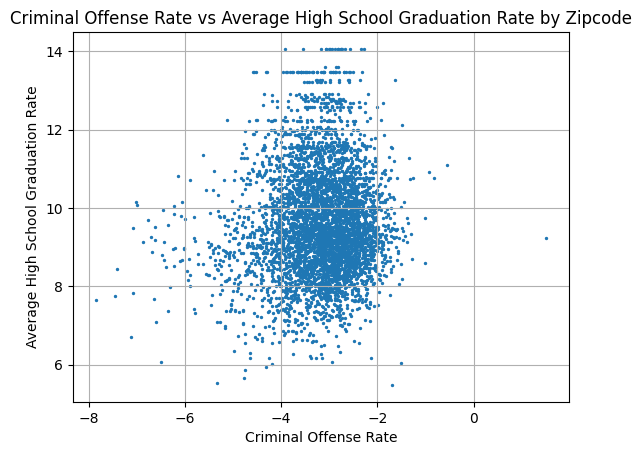

In [ ]:
plt.scatter(np.log(df['rate_offenses']), np.log(df['avg_high_school_grad']), s=2)
plt.title('Criminal Offense Rate vs Average High School Graduation Rate by Zipcode')
plt.xlabel('Criminal Offense Rate')
plt.ylabel('Average High School Graduation Rate')
plt.grid(True)
plt.show()

#### Crimes Against Persons

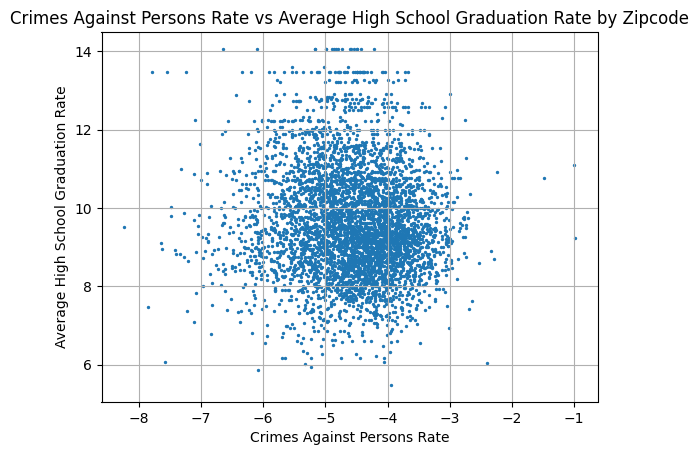

In [ ]:
plt.scatter(np.log(df['rate_persons']), np.log(df['avg_high_school_grad']), s=2)
plt.title('Crimes Against Persons Rate vs Average High School Graduation Rate by Zipcode')
plt.xlabel('Crimes Against Persons Rate')
plt.ylabel('Average High School Graduation Rate')
plt.grid(True)
plt.show()

#### Crimes Against Property

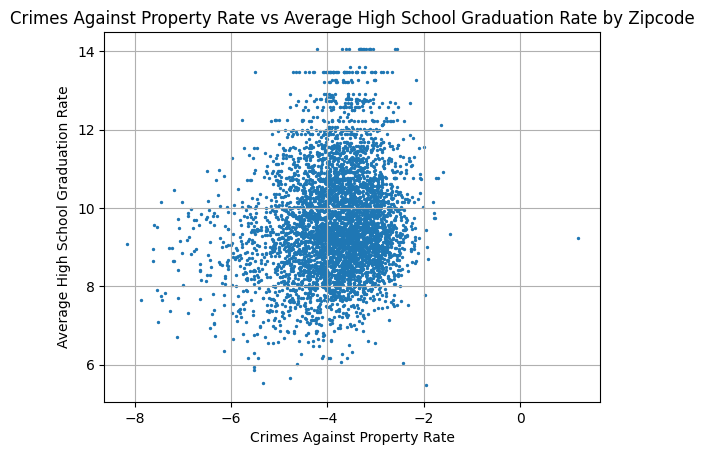

In [ ]:
plt.scatter(np.log(df['rate_property']), np.log(df['avg_high_school_grad']), s=2)
plt.title('Crimes Against Property Rate vs Average High School Graduation Rate by Zipcode')
plt.xlabel('Crimes Against Property Rate')
plt.ylabel('Average High School Graduation Rate')
plt.grid(True)
plt.show()

#### Crimes Against Society

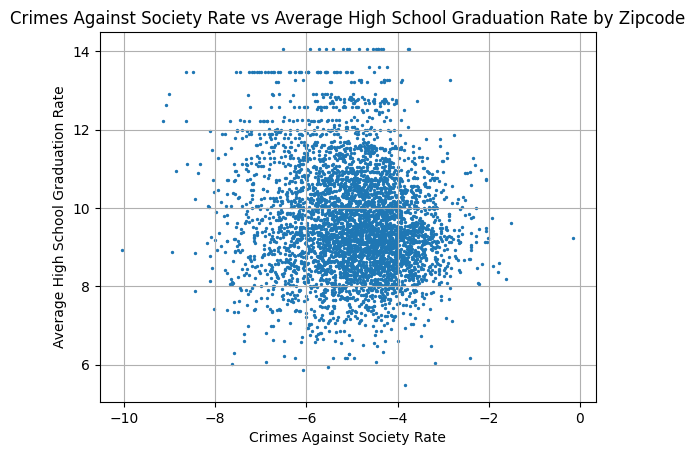

In [ ]:
plt.scatter(np.log(df['rate_society']), np.log(df['avg_high_school_grad']), s=2)
plt.title('Crimes Against Society Rate vs Average High School Graduation Rate by Zipcode')
plt.xlabel('Crimes Against Society Rate')
plt.ylabel('Average High School Graduation Rate')
plt.grid(True)
plt.show()

#### Analysis of Results

To my surprise, there was little to no correlation between high school graduation rate and crimes. Given the fact that there has been an established positive relationship between education and income, my initial assumption was that a higher high school graduation rate would correspond to a higher crime rate (especially given the fact that there was such relationship between median income and crime rate in the previous section).

However, there was little evidence of this relationship from the four plots. In fact, for high school graduation rate and criminal offenses, as well as high school graduation rate and crimes against property, there appeared to be a very slightly positive correlation — indicating that a lower high school graduation rate corresponds to a lower rate of crime.

From this, my hypothesis for the result described above is that crimes are typically committed by individuals in an older age group. As such, education level may play more of a role in explaining crime rate at the college level, and not the high school level. This also seems to be plausible given that high school is much more accessible to the public than college, which requires an application process for both public and private schools.

### Relationship Between Bachelor's Degree and Crimes by Zipcode


In [ ]:
%%bigquery --project $project_id

WITH adi_fips AS (
  SELECT
    a.zipcode,
    a.year,
    a.area_deprivation_index_percent,
    CAST(f.STCOUNTYFP as STRING) as fips,
  FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
  JOIN `cs145-403121.crime.zipcode_fips` f
  ON a.zipcode = CAST(f.ZIP as STRING)
), bachelors_degree AS (
  SELECT
    a.zipcode,
    AVG(c.bachelors_degree) AS avg_bachelors_degree,
  FROM
    adi_fips a
  JOIN
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  ON
    a.fips = c.geo_id
  WHERE
    a.year = 2020
    AND a.area_deprivation_index_percent > 0
    AND c.bachelors_degree > 0
  GROUP BY a.zipcode
)

SELECT
  c.state,
  c.city,
  c.zipcode,
  (c.total_offenses / c.population) as rate_offenses,
  (c.crimes_against_persons / c.population) as rate_persons,
  (c.crimes_against_property / c.population) as rate_property,
  (c.crimes_against_society / c.population) as rate_society,
  b.avg_bachelors_degree
FROM `cs145-403121.crime.crime_by_zip` c
JOIN bachelors_degree b
ON c.zipcode = b.zipcode
GROUP BY
  c.state,
  c.city,
  c.zipcode,
  c.total_offenses,
  c.crimes_against_persons,
  c.crimes_against_property,
  c.crimes_against_society,
  c.population,
  b.avg_bachelors_degree
ORDER BY c.total_offenses

Query is running:   0%|          |

Downloading:   0%|          |

,state,city,zipcode,rate_offenses,rate_persons,rate_property,rate_society,avg_bachelors_degree
0,Alabama,Greensboro,36744,0.000000,0.000000,0.000000,0.000000,1063.0
1,Alabama,Lockhart,36455,0.000000,0.000000,0.000000,0.000000,2455.0
2,Alabama,Pennington,36916,0.000000,0.000000,0.000000,0.000000,761.0
3,Alabama,Sweet Water,36782,0.000000,0.000000,0.000000,0.000000,1349.5
4,Alabama,Walnut Grove,35990,0.000000,0.000000,0.000000,0.000000,7764.0
...,...,...,...,...,...,...,...,...
4797,Michigan,Detroit,48201,0.132905,0.046007,0.079356,0.007542,181260.0
4798,Texas,Dallas,75065,0.083213,0.022213,0.051000,0.010001,175253.0
4799,Pennsylvania,Philadelphia,17959,0.097841,0.023076,0.067731,0.007034,12030.0
4800,Texas,San Antonio,78201,0.105360,0.025273,0.071492,0.008595,227899.0


In [ ]:
df = _

#### Criminal Offenses

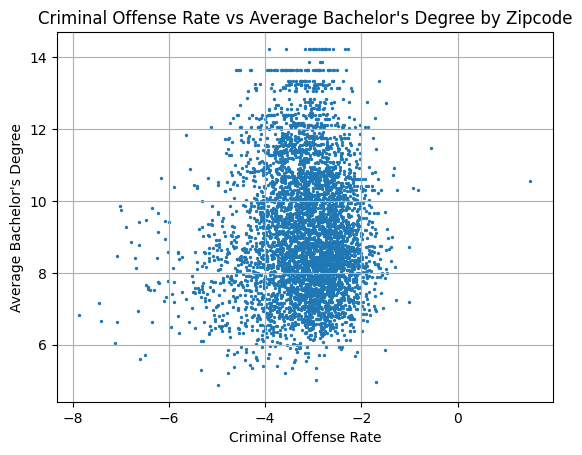

In [ ]:
plt.scatter(np.log(df['rate_offenses']), np.log(df['avg_bachelors_degree']), s=2)
plt.title("Criminal Offense Rate vs Average Bachelor's Degree by Zipcode")
plt.xlabel('Criminal Offense Rate')
plt.ylabel("Average Bachelor's Degree")
plt.grid(True)
plt.show()

#### Crimes Against Persons

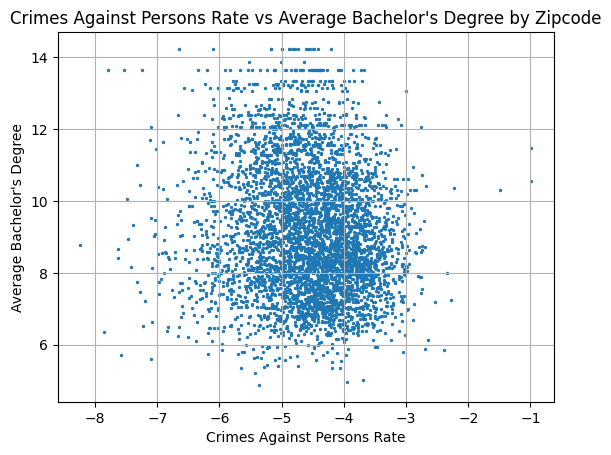

In [ ]:
plt.scatter(np.log(df['rate_persons']), np.log(df['avg_bachelors_degree']), s=2)
plt.title("Crimes Against Persons Rate vs Average Bachelor's Degree by Zipcode")
plt.xlabel('Crimes Against Persons Rate')
plt.ylabel("Average Bachelor's Degree")
plt.grid(True)
plt.show()

#### Crimes Against Property

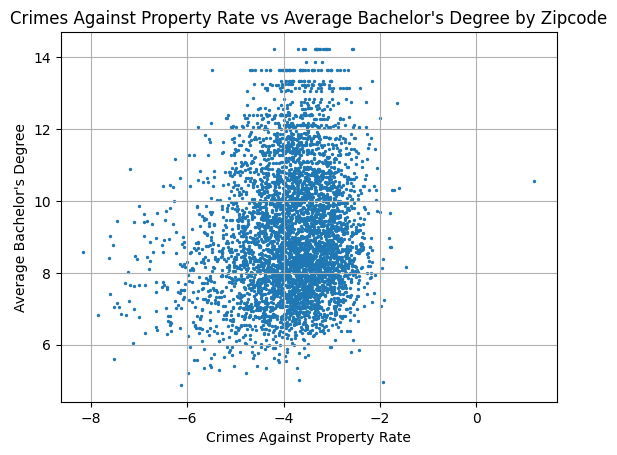

In [ ]:
plt.scatter(np.log(df['rate_property']), np.log(df['avg_bachelors_degree']), s=2)
plt.title("Crimes Against Property Rate vs Average Bachelor's Degree by Zipcode")
plt.xlabel('Crimes Against Property Rate')
plt.ylabel("Average Bachelor's Degree")
plt.grid(True)
plt.show()

#### Crimes Against Society

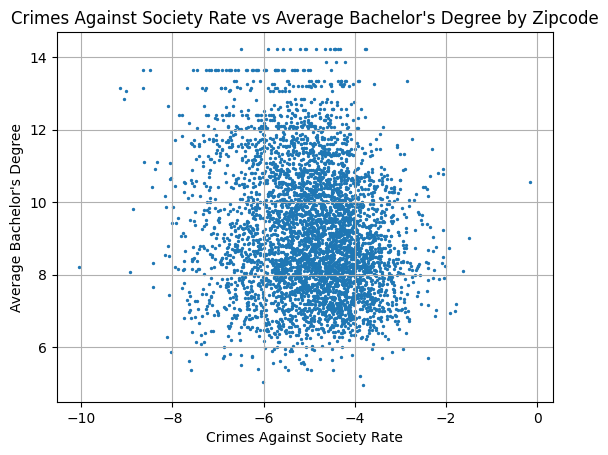

In [ ]:
plt.scatter(np.log(df['rate_society']), np.log(df['avg_bachelors_degree']), s=2)
plt.title("Crimes Against Society Rate vs Average Bachelor's Degree by Zipcode")
plt.xlabel('Crimes Against Society Rate')
plt.ylabel("Average Bachelor's Degree")
plt.grid(True)
plt.show()

#### Analysis of Results

There appears to be a slightly stronger correlation for bachelor's degree and crime rate in comparison to high school graduation rate and crime rate, as analyzed above.

Interestingly, however, the relationship between bachelor's degree and crime rate is different depending on the subcategory of crime.

For criminal offenses and crimes against property, there appears to be a very slightly positive relationship. This means that zipcodes with a higher percentage of college graduates will tend to have a higher crime rate. This goes against the prediction I made in the previous section, that having a higher percentage of college graduates will correspond to a lower rate of crime. Given that crimes against property typically involve taking illegal measures to obtain money, property, or some other benefit, one possible reason for the relationship we see in these two plots might be the fact that people are using their education for the purpose of devising creative measures to increase their wealth.

For crimes against persons and crimes against society, on the other hand, there appears to be a very slightly negative relationship. This aligns with my hypothesis that a more highly educated population will typically experience lower crime rates.

In analyzing the reason for the difference described above, it is important to note that for both relationships, the relationship is so weak that the differences may simply be a result of random variance or error in data collection.

## Baseline and Data Prediction

---

Since all of the factors I examined seemed to have the strongest correlation against the rate of crimes against society by zipcode, I will be focusing on the relationship between these factors and the rate of crimes against society.

The following factors appeared to have some correlation:
- ADI percentile
- Median income
- High school graduation rate
- Bachelor's degree

---

I divided my dataset into three sets: training, validation, and test on the following condition:
- Training: the first digit of the zipcode is 0 or 2
- Validation: the first digit of the zipcode is 4 or 6
- Test: the first digit of the zipcode is 8 or odd

#### Baseline (KNN Model)

In [ ]:
%%bigquery --project $project_id

WITH adi_fips AS (
  SELECT
    a.zipcode,
    a.year,
    a.area_deprivation_index_percent,
    CAST(f.STCOUNTYFP as STRING) as fips
  FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
  JOIN `cs145-403121.crime.zipcode_fips` f
  ON a.zipcode = CAST(f.ZIP as STRING)
),
median_income AS (
  SELECT
    a.zipcode,
    AVG(c.median_income) AS avg_median_income
  FROM
    adi_fips a
  JOIN
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  ON
    a.fips = c.geo_id
  WHERE
    a.year = 2020
    AND a.area_deprivation_index_percent > 0
    AND c.median_income > 0
  GROUP BY a.zipcode
),
high_school_grad AS (
  SELECT
    a.zipcode,
    AVG(c.high_school_diploma) AS avg_high_school_grad
  FROM
    adi_fips a
  JOIN
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  ON
    a.fips = c.geo_id
  WHERE
    a.year = 2020
    AND a.area_deprivation_index_percent > 0
    AND c.high_school_diploma > 0
  GROUP BY a.zipcode
),
bachelors_degree AS (
  SELECT
    a.zipcode,
    AVG(c.bachelors_degree) AS avg_bachelors_degree
  FROM
    adi_fips a
  JOIN
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  ON
    a.fips = c.geo_id
  WHERE
    a.year = 2020
    AND a.area_deprivation_index_percent > 0
    AND c.bachelors_degree > 0
  GROUP BY a.zipcode
),
data_combined AS (
  SELECT
    c.zipcode,
    (c.crimes_against_society / c.population) as rate_society,
    a.area_deprivation_index_percent as adi,
    m.avg_median_income,
    h.avg_high_school_grad,
    b.avg_bachelors_degree
  FROM `cs145-403121.crime.crime_by_zip` c
  JOIN adi_fips a ON c.zipcode = a.zipcode
  JOIN median_income m ON c.zipcode = m.zipcode
  JOIN high_school_grad h ON c.zipcode = h.zipcode
  JOIN bachelors_degree b ON c.zipcode = b.zipcode
  WHERE
    a.year = 2020
    AND a.area_deprivation_index_percent > 0
    AND c.population > 0
),
training_data AS (
  SELECT *
  FROM data_combined
  WHERE CASE
        WHEN REGEXP_CONTAINS(zipcode, r'^[0-9]') THEN MOD(CAST(SUBSTRING(zipcode, 1, 1) AS INT64), 10) IN (0, 2)
      END
),
validation_data AS (
  SELECT *
  FROM data_combined
  WHERE CASE
          WHEN REGEXP_CONTAINS(zipcode, r'^[0-9]') THEN MOD(CAST(SUBSTRING(zipcode, 1, 1) AS INT64), 10) IN (4, 6)
        END
),
test_data AS (
  SELECT *
  FROM data_combined
  WHERE CASE
          WHEN REGEXP_CONTAINS(zipcode, r'^[0-9]') THEN MOD(CAST(SUBSTRING(zipcode, 1, 1) AS INT64), 10) IN (8) OR
            NOT MOD(CAST(SUBSTRING(zipcode, 1, 1) AS INT64), 10) IN (0, 2, 4, 6)
          ELSE TRUE
        END
),
distance_calculations AS (
  SELECT
    test.zipcode as test_zipcode,
    training.rate_society,
    SQRT(
      POW(test.adi - training.adi, 2) +
      POW(test.avg_median_income - training.avg_median_income, 2) +
      POW(test.avg_high_school_grad - training.avg_high_school_grad, 2) +
      POW(test.avg_bachelors_degree - training.avg_bachelors_degree, 2)
    ) as distance
  FROM
    test_data test
  CROSS JOIN
    training_data training
),
ranked_distances AS (
  SELECT
    test_zipcode,
    rate_society,
    distance,
    ROW_NUMBER() OVER (PARTITION BY test_zipcode ORDER BY distance) as rank
  FROM distance_calculations
),
predictions AS (
  SELECT
    test_zipcode as zipcode,
    AVG(rate_society) as predicted_rate_society
  FROM
    ranked_distances
  WHERE
    rank <= 10
  GROUP BY
    test_zipcode
),
actuals AS (
  SELECT
    c.zipcode,
    (c.crimes_against_society / NULLIF(c.population, 0)) as actual_rate_society
  FROM `cs145-403121.crime.crime_by_zip` c
  JOIN adi_fips a ON c.zipcode = a.zipcode
  WHERE
    a.year = 2020
    AND a.area_deprivation_index_percent > 0
    AND CASE
            WHEN REGEXP_CONTAINS(c.zipcode, r'^[0-9]') THEN MOD(CAST(SUBSTRING(c.zipcode, 1, 1) AS INT64), 2) != 0
            ELSE TRUE
        END
)
SELECT
  a.zipcode,
  a.actual_rate_society,
  p.predicted_rate_society
FROM actuals a
LEFT JOIN predictions p ON a.zipcode = p.zipcode

Query is running:   0%|          |

Downloading:   0%|          |

,zipcode,actual_rate_society,predicted_rate_society
0,36003,0.007624,0.010036
1,36066,0.010367,0.006518
2,36701,0.001445,0.007766
3,36527,0.006923,0.026367
4,36576,0.012677,0.026367
...,...,...,...
4336,37398,0.019891,0.013983
4337,37388,0.017233,0.024494
4338,37160,0.015190,0.003458
4339,37334,0.019159,0.026503


In [ ]:
%%bigquery --project $project_id

CREATE TABLE IF NOT EXISTS testing.testing_data AS
SELECT
  dc.zipcode,
  (dc.crimes_against_society / dc.population) as rate_society,
  af.area_deprivation_index_percent as adi,
  mi.avg_median_income,
  hsg.avg_high_school_grad,
  bd.avg_bachelors_degree
FROM
  `cs145-403121.crime.crime_by_zip` dc
JOIN
  (SELECT
     a.zipcode,
     a.year,
     a.area_deprivation_index_percent,
     CAST(f.STCOUNTYFP as STRING) as fips
   FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
   JOIN `cs145-403121.crime.zipcode_fips` f ON a.zipcode = CAST(f.ZIP as STRING)
  ) af ON dc.zipcode = af.zipcode
JOIN
  (SELECT
     CAST(f.ZIP AS STRING) as zipcode,
     AVG(c.median_income) AS avg_median_income
   FROM `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
   JOIN `cs145-403121.crime.zipcode_fips` f ON CAST(f.STCOUNTYFP AS STRING) = c.geo_id
   WHERE c.median_income > 0
   GROUP BY f.ZIP
  ) mi ON dc.zipcode = mi.zipcode
JOIN
  (SELECT
     CAST(f.ZIP AS STRING) as zipcode,
     AVG(c.high_school_diploma) AS avg_high_school_grad
   FROM `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
   JOIN `cs145-403121.crime.zipcode_fips` f ON CAST(f.STCOUNTYFP AS STRING) = c.geo_id
   WHERE c.high_school_diploma > 0
   GROUP BY f.ZIP
  ) hsg ON dc.zipcode = hsg.zipcode
JOIN
  (SELECT
     CAST(f.ZIP AS STRING) as zipcode,
     AVG(c.bachelors_degree) AS avg_bachelors_degree
   FROM `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
   JOIN `cs145-403121.crime.zipcode_fips` f ON CAST(f.STCOUNTYFP AS STRING) = c.geo_id
   WHERE c.bachelors_degree > 0
   GROUP BY f.ZIP
  ) bd ON dc.zipcode = bd.zipcode
WHERE
  af.year = 2020
  AND af.area_deprivation_index_percent > 0
  AND dc.population > 0
  AND REGEXP_CONTAINS(dc.zipcode, r'^[0-9]')
  AND MOD(CAST(SUBSTRING(dc.zipcode, 1, 1) AS INT64), 10) IN (8) OR
    NOT MOD(CAST(SUBSTRING(dc.zipcode, 1, 1) AS INT64), 10) IN (0, 2, 4, 6)

Query is running:   0%|          |

""


In [ ]:
df = _

In [ ]:
# Drop rows with NaN
clean_df = df.dropna(subset=['actual_rate_society', 'predicted_rate_society'])

# Calculate MSE
mse = mean_squared_error(clean_df['actual_rate_society'], clean_df['predicted_rate_society'])
print("Mean Squared Error:", mse)

Mean Squared Error: 0.00035559230486082247


#### ML (Linear Regression)

#### Initial Model

In [ ]:
model_dataset_name = 'crime_ml'

dataset = bigquery.Dataset(client.dataset(model_dataset_name))
dataset.location = 'US'
client.create_dataset(dataset)

Dataset(DatasetReference('cs145-403121', 'crime_ml'))

In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE MODEL `crime_ml.socioeconomic_model`
OPTIONS(model_type = 'LINEAR_REG') AS
WITH adi_fips AS (
  SELECT
    a.zipcode,
    a.year,
    a.area_deprivation_index_percent,
    CAST(f.STCOUNTYFP as STRING) as fips
  FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
  JOIN `cs145-403121.crime.zipcode_fips` f
  ON a.zipcode = CAST(f.ZIP as STRING)
),
median_income AS (
  SELECT
    a.zipcode,
    AVG(c.median_income) AS avg_median_income
  FROM
    adi_fips a
  JOIN
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  ON
    a.fips = c.geo_id
  WHERE
    a.year = 2020
    AND c.median_income > 0
  GROUP BY a.zipcode
),
high_school_grad AS (
  SELECT
    a.zipcode,
    AVG(c.high_school_diploma) AS avg_high_school_grad
  FROM
    adi_fips a
  JOIN
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  ON
    a.fips = c.geo_id
  WHERE
    a.year = 2020
    AND c.high_school_diploma > 0
  GROUP BY a.zipcode
),
bachelors_degree AS (
  SELECT
    a.zipcode,
    AVG(c.bachelors_degree) AS avg_bachelors_degree
  FROM
    adi_fips a
  JOIN
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  ON
    a.fips = c.geo_id
  WHERE
    a.year = 2020
    AND c.bachelors_degree > 0
  GROUP BY a.zipcode
)
SELECT
  c.adi as feature1,
  m.avg_median_income as feature2,
  h.avg_high_school_grad as feature3,
  b.avg_bachelors_degree as feature4,
  c.rate_society AS label
FROM (
  SELECT
    c.zipcode,
    (c.crimes_against_society / c.population) as rate_society,
    a.area_deprivation_index_percent as adi
  FROM
    `cs145-403121.crime.crime_by_zip` c
  JOIN
    `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
  ON c.zipcode = a.zipcode
  WHERE
    a.year = 2020
    AND CASE
            WHEN REGEXP_CONTAINS(c.zipcode, r'^[0-9]') THEN MOD(CAST(SUBSTRING(c.zipcode, 1, 1) AS INT64), 10) IN (0, 2)
            ELSE FALSE
        END
  GROUP BY
    c.zipcode, c.crimes_against_society, c.population, a.area_deprivation_index_percent
) c
JOIN median_income m ON c.zipcode = m.zipcode
JOIN high_school_grad h ON c.zipcode = h.zipcode
JOIN bachelors_degree b ON c.zipcode = b.zipcode

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `crime_ml.socioeconomic_model`)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,0,0.000412,NaN,NaN,2385


In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `crime_ml.socioeconomic_model`, (
    WITH adi_fips AS (
      SELECT
        a.zipcode,
        a.year,
        a.area_deprivation_index_percent,
        CAST(f.STCOUNTYFP as STRING) as fips
      FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
      JOIN `cs145-403121.crime.zipcode_fips` f
      ON a.zipcode = CAST(f.ZIP as STRING)
    ),
    median_income AS (
      SELECT
        a.zipcode,
        AVG(c.median_income) AS avg_median_income
      FROM
        adi_fips a
      JOIN
        `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
      ON
        a.fips = c.geo_id
      WHERE
        a.year = 2020
        AND a.area_deprivation_index_percent > 0
        AND c.median_income > 0
      GROUP BY a.zipcode
    ),
    high_school_grad AS (
      SELECT
        a.zipcode,
        AVG(c.high_school_diploma) AS avg_high_school_grad
      FROM
        adi_fips a
      JOIN
        `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
      ON
        a.fips = c.geo_id
      WHERE
        a.year = 2020
        AND a.area_deprivation_index_percent > 0
        AND c.high_school_diploma > 0
      GROUP BY a.zipcode
    ),
    bachelors_degree AS (
      SELECT
        a.zipcode,
        AVG(c.bachelors_degree) AS avg_bachelors_degree
      FROM
        adi_fips a
      JOIN
        `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
      ON
        a.fips = c.geo_id
      WHERE
        a.year = 2020
        AND a.area_deprivation_index_percent > 0
        AND c.bachelors_degree > 0
      GROUP BY a.zipcode
    )
    SELECT
      c.adi as feature1,
      m.avg_median_income as feature2,
      h.avg_high_school_grad as feature3,
      b.avg_bachelors_degree as feature4,
      c.rate_society AS label
    FROM (
      SELECT
        c.zipcode,
        (c.crimes_against_society / c.population) as rate_society,
        a.area_deprivation_index_percent as adi
      FROM
        `cs145-403121.crime.crime_by_zip` c
      JOIN
        `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
      ON c.zipcode = a.zipcode
      WHERE
        a.year = 2020
        AND a.area_deprivation_index_percent > 0
        AND CASE
                WHEN REGEXP_CONTAINS(c.zipcode, r'^[0-9]') THEN MOD(CAST(SUBSTRING(c.zipcode, 1, 1) AS INT64), 10) IN (8) OR
                  NOT MOD(CAST(SUBSTRING(c.zipcode, 1, 1) AS INT64), 10) IN (0, 2, 4, 6)
                ELSE FALSE
            END
      GROUP BY
        c.zipcode, c.crimes_against_society, c.population, a.area_deprivation_index_percent
    ) c
    JOIN median_income m ON c.zipcode = m.zipcode
    JOIN high_school_grad h ON c.zipcode = h.zipcode
    JOIN bachelors_degree b ON c.zipcode = b.zipcode
    )
  )

Query is running:   0%|          |

Downloading:   0%|          |

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,0.013889,0.000756,0.000586,0.010262,-0.731021,-0.598195


We can choose some of the metrics above to evaluate the performance of this model:

- Mean absolute error (MAE): The MAE value of 0.013889 suggests that the average deviation of the predicted values from the actual values is relatively small. However, taking into account the small range of the target variable, this error could potentially be significant.
- Mean squared error (MSE): The MSE value of 0.000756 is relatively low, suggesting decent model performance. However, this MSE value could definitely still be improved given the scale of the data.
- R² score: The negative R² value of -0.731021 indicates poor model performance. Going back to the analysis for MAE and MSE, this may indicate that the relatively low values we saw for MAE and MSE might be misleading.

To improve the model, we will try introducing more potentially relevant features through feature engineering.








#### Improved Model with Engineered Features

The engineered features I will be adding are as follows:
- Population density (population / area): Zipcodes with higher population density might have different crime patterns compared to lower density areas
- State-adjusted median income: Comparison of median income relative to statewide average median income

I think exploring population density, in particular, could be interesting. According to the Criminal Victimization report from the Department of Justice’s (DOJ) Bureau of Justice Statistics, crime rates in urban areas were almost double that of in rural areas, suggesting that a higher population density correlates with a higher crime rate. On the other hand, however, Japan has one of the lowest rates of crime in the world despite the fact that many cities like Tokyo are very dense.

In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE MODEL `crime_ml.engineered_model`
OPTIONS(model_type = 'LINEAR_REG') AS
WITH adi_fips AS (
  SELECT
    a.zipcode,
    a.year,
    a.area_deprivation_index_percent,
    CAST(f.STCOUNTYFP as STRING) as fips
  FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
  JOIN `cs145-403121.crime.zipcode_fips` f
  ON a.zipcode = CAST(f.ZIP as STRING)
),
median_income AS (
  SELECT
    a.zipcode,
    AVG(c.median_income) AS avg_median_income
  FROM
    adi_fips a
  JOIN
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  ON
    a.fips = c.geo_id
  WHERE
    a.year = 2020
    AND c.median_income > 0
  GROUP BY a.zipcode
),
high_school_grad AS (
  SELECT
    a.zipcode,
    AVG(c.high_school_diploma) AS avg_high_school_grad
  FROM
    adi_fips a
  JOIN
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  ON
    a.fips = c.geo_id
  WHERE
    a.year = 2020
    AND c.high_school_diploma > 0
  GROUP BY a.zipcode
),
bachelors_degree AS (
  SELECT
    a.zipcode,
    AVG(c.bachelors_degree) AS avg_bachelors_degree
  FROM
    adi_fips a
  JOIN
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  ON
    a.fips = c.geo_id
  WHERE
    a.year = 2020
    AND c.bachelors_degree > 0
  GROUP BY a.zipcode
),
state_average_income AS (
  SELECT
    pd.state,
    AVG(c.median_income) AS avg_state_median_income
  FROM
    `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
  JOIN `cs145-403121.crime.zipcode_fips` f
  ON c.geo_id = CAST(f.STCOUNTYFP as STRING)
  JOIN `cs145-403121.crime.pop_density` pd
  ON f.ZIP = pd.zipcode
  GROUP BY pd.state
),
data_with_features AS (
  SELECT
    c.zipcode,
    a.area_deprivation_index_percent as adi,
    m.avg_median_income,
    h.avg_high_school_grad,
    b.avg_bachelors_degree,
    pd.density as population_density, -- Engineered Feature 1: Population density
    (m.avg_median_income - s.avg_state_median_income) as state_adjusted_median_income, -- Engineered Feature 2: State-adjusted median incomes
    (c.crimes_against_society / NULLIF(c.population, 0)) as rate_society  -- Calculating rate_society
  FROM `cs145-403121.crime.crime_by_zip` c
  JOIN adi_fips a ON c.zipcode = a.zipcode
  JOIN median_income m ON c.zipcode = m.zipcode
  JOIN high_school_grad h ON c.zipcode = h.zipcode
  JOIN bachelors_degree b ON c.zipcode = b.zipcode
  JOIN `cs145-403121.crime.pop_density` pd ON c.zipcode = CAST(pd.zipcode as STRING)
  JOIN state_average_income s ON c.state = s.state
  WHERE
    a.year = 2020
    AND c.population > 0
)

SELECT
  adi as feature1,
  avg_median_income as feature2,
  avg_high_school_grad as feature3,
  avg_bachelors_degree as feature4,
  population_density as feature5,
  state_adjusted_median_income as feature6,
  rate_society AS label
FROM
  data_with_features
WHERE
  CASE
    WHEN REGEXP_CONTAINS(zipcode, r'^[0-9]') THEN MOD(CAST(SUBSTRING(zipcode, 1, 1) AS INT64), 10) IN (4, 6)
    ELSE FALSE
  END

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `crime_ml.engineered_model`)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,0,0.00069,0.000258,NaN,2332


In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `crime_ml.engineered_model`, (
    WITH adi_fips AS (
      SELECT
        a.zipcode,
        a.year,
        a.area_deprivation_index_percent,
        CAST(f.STCOUNTYFP as STRING) as fips
      FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
      JOIN `cs145-403121.crime.zipcode_fips` f
      ON a.zipcode = CAST(f.ZIP as STRING)
    ),
    median_income AS (
      SELECT
        a.zipcode,
        AVG(c.median_income) AS avg_median_income
      FROM
        adi_fips a
      JOIN
        `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
      ON
        a.fips = c.geo_id
      WHERE
        a.year = 2020
        AND a.area_deprivation_index_percent > 0
        AND c.median_income > 0
      GROUP BY a.zipcode
    ),
    high_school_grad AS (
      SELECT
        a.zipcode,
        AVG(c.high_school_diploma) AS avg_high_school_grad
      FROM
        adi_fips a
      JOIN
        `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
      ON
        a.fips = c.geo_id
      WHERE
        a.year = 2020
        AND a.area_deprivation_index_percent > 0
        AND c.high_school_diploma > 0
      GROUP BY a.zipcode
    ),
    bachelors_degree AS (
      SELECT
        a.zipcode,
        AVG(c.bachelors_degree) AS avg_bachelors_degree
      FROM
        adi_fips a
      JOIN
        `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
      ON
        a.fips = c.geo_id
      WHERE
        a.year = 2020
        AND a.area_deprivation_index_percent > 0
        AND c.bachelors_degree > 0
      GROUP BY a.zipcode
    ),
    state_average_income AS (
      SELECT
        pd.state,
        AVG(c.median_income) AS avg_state_median_income
      FROM
        `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
      JOIN `cs145-403121.crime.zipcode_fips` f
      ON c.geo_id = CAST(f.STCOUNTYFP as STRING)
      JOIN `cs145-403121.crime.pop_density` pd
      ON f.ZIP = pd.zipcode
      GROUP BY pd.state
    ),
    data_with_features AS (
      SELECT
        c.zipcode,
        a.area_deprivation_index_percent as adi,
        m.avg_median_income,
        h.avg_high_school_grad,
        b.avg_bachelors_degree,
        pd.density as population_density, -- Engineered Feature 1: Population density
        (m.avg_median_income - s.avg_state_median_income) as state_adjusted_median_income, -- Engineered Feature 2: State-adjusted median incomes
        (c.crimes_against_society / NULLIF(c.population, 0)) as rate_society  -- Calculating rate_society
      FROM `cs145-403121.crime.crime_by_zip` c
      JOIN adi_fips a ON c.zipcode = a.zipcode
      JOIN median_income m ON c.zipcode = m.zipcode
      JOIN high_school_grad h ON c.zipcode = h.zipcode
      JOIN bachelors_degree b ON c.zipcode = b.zipcode
      JOIN `cs145-403121.crime.pop_density` pd ON c.zipcode = CAST(pd.zipcode as STRING)
      JOIN state_average_income s ON c.state = s.state
      WHERE
        a.year = 2020
        AND c.population > 0
    )
    SELECT
      adi as feature1,
      avg_median_income as feature2,
      avg_high_school_grad as feature3,
      avg_bachelors_degree as feature4,
      population_density as feature5,
      state_adjusted_median_income as feature6,
      rate_society AS label
    FROM
      data_with_features
    WHERE
      CASE
        WHEN REGEXP_CONTAINS(zipcode, r'^[0-9]') THEN MOD(CAST(SUBSTRING(zipcode, 1, 1) AS INT64), 10) IN (8) OR
          NOT MOD(CAST(SUBSTRING(zipcode, 1, 1) AS INT64), 10) IN (0, 2, 4, 6)
        ELSE FALSE
      END
    )
  )

Query is running:   0%|          |

Downloading:   0%|          |

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,0.028373,0.003192,0.00268,0.006966,-5.372009,-4.679788


We can choose some of the metrics above to evaluate the performance of this model:

- Mean absolute error (MAE): The improved model had an MAE value of 0.028373. This value is almost double that of the initial model's MAE value of 0.013889, suggesting that the absolute error increased after adding engineered features.
- Mean squared error (MSE): The improved model had an MSE value of 0.003192. This value is more than four times that the initial model's MSE value of 0.000756, suggesting that the model's predictions have become less accurate after adding engineered features.
- R² score: The improved model had an R² score of -5.372009 — a significant decrease from the initial model, which had an R² value of -0.731021. From this, we see that the model now fits the data worse, and less of the variance in the data is captured by the model.

Overall, the model's performance is poor, and feature engineering appears to have negatively impacted the model's ability to explain the variance in the data. Some possible reasons for this might include that the relationships in the data are complex or non-linear, suggesting that a linear regression is not suitable for the given data. Additionally, it may also simply be that the features we added are completely irrelevant to crime rate, creating confusion in the model.

### Comparison Between Baseline and ML Solution


---

#### Mean Squared Error Comparison
To evaluate performance of the DB-based baseline, I used mean squared error (MSE), since this metric is also used to evaluate linear regression models (ML solution). The MSE evaluates how well the model's predictions align with the actual data. The MSE for the baseline and ML solution were as follows:
- Baseline: 0.000356
- ML solution: 0.003192

The ML solution performed significantly better than the baseline — in fact, MSE for the baseline KNN model was approximately 10x smaller than that of the ML solution. This may be due to the fact that there were non-linear / more complex relationships in the data that the baseline captured and ML solution did not capture. Since the ML solution uses a linear regression model, it is possible that complex relationships were oversimplified.

---

---

#### Time to Process Data and Train Model  
We will begin by evaluating the time and cost for the DB-based KNN model and linear regression model:

- KNN model: 4.32 seconds
- ML solution: 15.61 seconds

In this case, the KNN model outperformed the ML solution. This may be due to the fact that the dataset we used was relatively small — it is important to note that the time complexity for KNN can be quite high when the dataset is large. This is due to the fact that we must compute the distance to all training data points for each prediction. As such, each prediction is computationally expensive. Therefore, for larger datasets, KNN may not be the most efficient method.

Additionally, the cost of linear regression is primarily upfront, during the training phase. Once the model is trained, however, we can make predictions relatively quickly. Since the time complexity of linear regression is most commonly O(n), we can assume that for an implementation with such time complexity, linear regression is more ideal than KNN for larger datasets.

Next, we will compare the cost for the two models.

---

---

#### Cost Analysis Based on I/Os and Monetary Cost

##### I/O Cost for Baseline
In the KNN method, we join the `training_data` with the `test_data`. By storing the two tables in BigQuery, we see that `training_data` is 655 KB and `test_data` is 38 KB. Assuming that each page is 4 KB, `training_data` has 655 / 4 = 164 pages and `test_data` has 10 pages.

We will assume that the cost for reading a page and writing a page are both 1 I/O. Additionally, we will assume that the number of rows fit in main memory and B = 1,000.

In the final table, each row has 24 bytes: 8 bytes for the `zipcode`, 8 bytes for `actual_rate_society`, and 8 bytes for `predicted_rate_society`. Since there are a total of 4,341 rows, the size of the table is 104,184 bytes. This means that the final table has 26 pages.

We can now apply the equations for BNLJ, HPJ, and SMJ to see the following:
- BNLJ: 164 + 10 * (164 / 1,000) + 26 = 164 + 10 * 1 + 26 ~= 200 I/Os
- HPJ: 3(164 + 10) + 26 ~= 548 I/Os
- SMJ: BigSort(`training_data`) + BigSort(`test_data`) + (164 + 10) + 26 = 328 + 10 + 174 + 26 ~= 538 I/Os

##### I/O Cost for ML solution
The I/O cost for linear regression involves reading the data once per iteration during the initial training phase. From above, we see that the size of the training data is 655 KB. Since there is only one iteration, we can calculate the I/O cost as follows:
- I/O cost = amount of data processed * number of iterations = 655 KB * 1 = 655 KB

Given that the page size is 4 KB, we see that an I/O cost of 655 KB corresponds to 655 KB / 4 KB ~= 164 I/Os.

##### Monetary Cost for Baseline
Given that it costs $\$5$ to process 25 TB, and the number of bytes processed is extremely small in comparison, the expected monetary cost is approximately $\$0$.

##### Monetary Cost for ML Solution
Given that it costs $\$5$ to process 25 TB, and the number of bytes processed is extremely small in comparison, the expected monetary cost is approximately $\$0$.

##### Analysis
For the KNN method, it appars that BNLJ is the most efficient method, followed by SMJ and HPJ (which have similar I/O cost). This may be due to the fact that all of the data fits in RAM. Additionally, the sizes of `training_data` and `test_data` are relatively small. There are additional costs for SMJ and HPJ — for example, the sorting in operation in SMJ and hashing operation in HPJ may contribute to the I/O cost.

Since there is only one iteration in the ML solution, the I/O cost is fairly low, at approximately 164 I/Os.

---

#### Tables for I/O Calculation

In [ ]:
dataset = bigquery.Dataset(client.dataset('testing'))
dataset.location = 'US'
client.create_dataset(dataset)

Dataset(DatasetReference('cs145-403121', 'testing'))

In [ ]:
%%bigquery --project $project_id

CREATE TABLE IF NOT EXISTS testing.training_data AS
SELECT
  dc.zipcode,
  (dc.crimes_against_society / dc.population) as rate_society,
  af.area_deprivation_index_percent as adi,
  mi.avg_median_income,
  hsg.avg_high_school_grad,
  bd.avg_bachelors_degree
FROM
  `cs145-403121.crime.crime_by_zip` dc
JOIN
  (SELECT
     a.zipcode,
     a.year,
     a.area_deprivation_index_percent,
     CAST(f.STCOUNTYFP as STRING) as fips
   FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
   JOIN `cs145-403121.crime.zipcode_fips` f ON a.zipcode = CAST(f.ZIP as STRING)
  ) af ON dc.zipcode = af.zipcode
JOIN
  (SELECT
     CAST(f.ZIP AS STRING) as zipcode,
     AVG(c.median_income) AS avg_median_income
   FROM `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
   JOIN `cs145-403121.crime.zipcode_fips` f ON CAST(f.STCOUNTYFP AS STRING) = c.geo_id
   WHERE c.median_income > 0
   GROUP BY f.ZIP
  ) mi ON dc.zipcode = mi.zipcode
JOIN
  (SELECT
     CAST(f.ZIP AS STRING) as zipcode,
     AVG(c.high_school_diploma) AS avg_high_school_grad
   FROM `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
   JOIN `cs145-403121.crime.zipcode_fips` f ON CAST(f.STCOUNTYFP AS STRING) = c.geo_id
   WHERE c.high_school_diploma > 0
   GROUP BY f.ZIP
  ) hsg ON dc.zipcode = hsg.zipcode
JOIN
  (SELECT
     CAST(f.ZIP AS STRING) as zipcode,
     AVG(c.bachelors_degree) AS avg_bachelors_degree
   FROM `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
   JOIN `cs145-403121.crime.zipcode_fips` f ON CAST(f.STCOUNTYFP AS STRING) = c.geo_id
   WHERE c.bachelors_degree > 0
   GROUP BY f.ZIP
  ) bd ON dc.zipcode = bd.zipcode
WHERE
  af.year = 2020
  AND af.area_deprivation_index_percent > 0
  AND dc.population > 0
  AND REGEXP_CONTAINS(dc.zipcode, r'^[0-9]')
  AND MOD(CAST(SUBSTRING(dc.zipcode, 1, 1) AS INT64), 10) IN (0, 2)


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id

CREATE TABLE IF NOT EXISTS testing.testing_data AS
SELECT
  dc.zipcode,
  (dc.crimes_against_society / dc.population) as rate_society,
  af.area_deprivation_index_percent as adi,
  mi.avg_median_income,
  hsg.avg_high_school_grad,
  bd.avg_bachelors_degree
FROM
  `cs145-403121.crime.crime_by_zip` dc
JOIN
  (SELECT
     a.zipcode,
     a.year,
     a.area_deprivation_index_percent,
     CAST(f.STCOUNTYFP as STRING) as fips
   FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
   JOIN `cs145-403121.crime.zipcode_fips` f ON a.zipcode = CAST(f.ZIP as STRING)
  ) af ON dc.zipcode = af.zipcode
JOIN
  (SELECT
     CAST(f.ZIP AS STRING) as zipcode,
     AVG(c.median_income) AS avg_median_income
   FROM `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
   JOIN `cs145-403121.crime.zipcode_fips` f ON CAST(f.STCOUNTYFP AS STRING) = c.geo_id
   WHERE c.median_income > 0
   GROUP BY f.ZIP
  ) mi ON dc.zipcode = mi.zipcode
JOIN
  (SELECT
     CAST(f.ZIP AS STRING) as zipcode,
     AVG(c.high_school_diploma) AS avg_high_school_grad
   FROM `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
   JOIN `cs145-403121.crime.zipcode_fips` f ON CAST(f.STCOUNTYFP AS STRING) = c.geo_id
   WHERE c.high_school_diploma > 0
   GROUP BY f.ZIP
  ) hsg ON dc.zipcode = hsg.zipcode
JOIN
  (SELECT
     CAST(f.ZIP AS STRING) as zipcode,
     AVG(c.bachelors_degree) AS avg_bachelors_degree
   FROM `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
   JOIN `cs145-403121.crime.zipcode_fips` f ON CAST(f.STCOUNTYFP AS STRING) = c.geo_id
   WHERE c.bachelors_degree > 0
   GROUP BY f.ZIP
  ) bd ON dc.zipcode = bd.zipcode
WHERE
  af.year = 2020
  AND af.area_deprivation_index_percent > 0
  AND dc.population > 0
  AND REGEXP_CONTAINS(dc.zipcode, r'^[0-9]')
  AND MOD(CAST(SUBSTRING(dc.zipcode, 1, 1) AS INT64), 10) IN (8) OR
    NOT MOD(CAST(SUBSTRING(dc.zipcode, 1, 1) AS INT64), 10) IN (0, 2, 4, 6)

Query is running:   0%|          |

""


### Prediction using ML Model

In [ ]:
%%bigquery --project $project_id

SELECT
  zipcode,
  actual_label,
  predicted_label
FROM
  ML.PREDICT(MODEL `crime_ml.socioeconomic_model`, (
    WITH adi_fips AS (
      SELECT
        a.zipcode,
        a.year,
        a.area_deprivation_index_percent,
        CAST(f.STCOUNTYFP as STRING) as fips
      FROM `bigquery-public-data.broadstreet_adi.area_deprivation_index_by_zipcode` a
      JOIN `cs145-403121.crime.zipcode_fips` f
      ON a.zipcode = CAST(f.ZIP as STRING)
    ),
    median_income AS (
      SELECT
        a.zipcode,
        AVG(c.median_income) AS avg_median_income
      FROM
        adi_fips a
      JOIN
        `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
      ON
        a.fips = c.geo_id
      WHERE
        a.year = 2020
        AND c.median_income > 0
      GROUP BY a.zipcode
    ),
    high_school_grad AS (
      SELECT
        a.zipcode,
        AVG(c.high_school_diploma) AS avg_high_school_grad
      FROM
        adi_fips a
      JOIN
        `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
      ON
        a.fips = c.geo_id
      WHERE
        a.year = 2020
        AND c.high_school_diploma > 0
      GROUP BY a.zipcode
    ),
    bachelors_degree AS (
      SELECT
        a.zipcode,
        AVG(c.bachelors_degree) AS avg_bachelors_degree
      FROM
        adi_fips a
      JOIN
        `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
      ON
        a.fips = c.geo_id
      WHERE
        a.year = 2020
        AND c.bachelors_degree > 0
      GROUP BY a.zipcode
    ),
    state_average_income AS (
      SELECT
        pd.state,
        AVG(c.median_income) AS avg_state_median_income
      FROM
        `bigquery-public-data.census_bureau_acs.county_2020_5yr` c
      JOIN `cs145-403121.crime.zipcode_fips` f
      ON c.geo_id = CAST(f.STCOUNTYFP as STRING)
      JOIN `cs145-403121.crime.pop_density` pd
      ON f.ZIP = pd.zipcode
      GROUP BY pd.state
    ),
    data_with_features AS (
      SELECT
        c.zipcode,
        a.area_deprivation_index_percent as adi,
        m.avg_median_income,
        h.avg_high_school_grad,
        b.avg_bachelors_degree,
        pd.density as population_density, -- Engineered Feature 1: Population density
        (m.avg_median_income - s.avg_state_median_income) as state_adjusted_median_income, -- Engineered Feature 2: State-adjusted median incomes
        (c.crimes_against_society / NULLIF(c.population, 0)) as rate_society
      FROM `cs145-403121.crime.crime_by_zip` c
      JOIN adi_fips a ON c.zipcode = a.zipcode
      JOIN median_income m ON c.zipcode = m.zipcode
      JOIN high_school_grad h ON c.zipcode = h.zipcode
      JOIN bachelors_degree b ON c.zipcode = b.zipcode
      JOIN `cs145-403121.crime.pop_density` pd ON c.zipcode = CAST(pd.zipcode as STRING)
      JOIN state_average_income s ON c.state = s.state
      WHERE
        a.year = 2020
        AND c.population > 0
    )
    SELECT
      zipcode,
      adi as feature1,
      avg_median_income as feature2,
      avg_high_school_grad as feature3,
      avg_bachelors_degree as feature4,
      population_density as feature5,
      state_adjusted_median_income as feature6,
      rate_society as actual_label,
    FROM
      data_with_features
    WHERE
      CASE
        WHEN REGEXP_CONTAINS(zipcode, r'^[0-9]') THEN MOD(CAST(SUBSTRING(zipcode, 1, 1) AS INT64), 10) IN (8) OR
          NOT MOD(CAST(SUBSTRING(zipcode, 1, 1) AS INT64), 10) IN (0, 2, 4, 6)
        ELSE FALSE
      END
  ))
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,zipcode,actual_label,predicted_label
0,36003,0.007624,0.016362
1,36066,0.010367,0.013840
2,36701,0.001445,0.020854
3,36527,0.006923,0.015694
4,36576,0.012677,0.017298
5,36502,0.048500,0.021159
6,36561,0.024619,0.015740
7,36580,0.042848,0.018581
8,36535,0.015574,0.017436
9,36530,0.028487,0.017710


## Conclusion

---

#### Overview
In this project, I aimed to explore the correlation between socioeconomic status and crime rate in the US using the Area Deprivation Index (ADI) and other demographic factors as proxies for socioeconomic status.

---

---

#### Findings
- ADI and crime: There was little correlation between ADI and overall criminal offenses and crimes against property. On the other hand, there was a slight positive correlation for crimes against persons and crimes against society, suggesting stronger relation between economic advantage and these specific types of crimes.
- Median income and crime: There was a slightly negative relationship between median income and persons and society — this aligned with my initial assumption that wealthier neighborhoods will have a lower rate of crime. With this being said, however, the correlation was not as strong as I had anticipated, meaning there are other factors besides median income that contribute to crime rate.
- Education and crime: Surprisingly, there was little correlation between high school graduation rate and crime rate. There was, however, evidence of a relationship between a bachelor's degree and crime, depending on each type of crime. This suggests that while education might influence crime rate, this relationship may be more complex and is possibly influenced by other factors. For example, high school graduation rate may not have had the expected correlation because high school education quality varies significantly between different regions of the US.

---


---

#### Model Performance
While the baseline KNN model did show a much lower MSE value than the ML model (indicating better performance), it would be difficult to say that either model was successful in predicting crime rates given the provided socioeconomic factors. This suggests that ADI, median income, and education level may not necessarily be predictive of crime rate, or that there are more complex underlying factors contributing to the rate of crime across different regions.

Additionally, we can reasonably say that population density and state-adjusted median income have little correlation with crime rate, given that adding these engineered features significantly worsened the performance of the ML model. Given that there appears to be little correlation between population density and crime in other parts of the world (like Tokyo and Seoul), and that there was already little correlation between median income and crime rate, these results were not incredibly surprising.

It is also important to note that the poor performance of the model after adding engineered features may be due to the fact that there was a non-linear relationship between the variables.

In either case, it is clear that the relationship between these factors and crime rate is complex, and likely influenced by a mix of factors we analyzed and factors that we did not focus on for this project. The socioeconomic impacts on crime are multifaceted, and simply cannot be captured fully by the few indicators we included in this project. The weak correlations, particularly in the context of education level, were the most surprising to me. This suggests that simple assumptions may not always hold true, and may have underlying complexities that need to be explored.

---

---

#### Further Exploration
Given more time, I would explore additional socioeconomic variables, such as employment rates, quality of housing, quality / funding of education, access to public safety resources, etc. This would help me to gain a more comprehensive and complete understanding of the relationship between socioeconomic status and crime rate.

Additionally, given evidence of a potentially non-linear relationship, I would explroe models that are more suited towards these types of more complex relationships, such as neural networks. This may improve the performance of my model, and allow me to better predict and understand the variance in the data.

---



---

#### Final Thoughts
Coming into this project, I definitely had my own set of assumptions. More specifically, I based my hypothesis that regions with lower socioeconomic status would have a higher crime rate on societal stereotypes, although there does exist some data suggesting this relationship.

Upon exploring possible correlations between my chosen variables and the rate of crime in different US zipcodes, I realized that socioeconomic influences are incredibly nuanced, and likely interwoven with numerous other factors that may or may not be related to economic disadvantage.

This project ultimately reinforced the impact of bias for me. While we all have our own set of assumptions based on personal experiences and societal norms, these assumptions *are* ultimately, assumptions. It is for this reason why I was particularly cautious about using demographic data from the census, because attributing certain factors like race or gender to a non-neutral topic like crime could reinforce such biases if there happens to be evidence of a correlation.

I learned a lot through this project, both in terms of broader implications of establishing relationships between variables (as described above), and in terms of CS 145 content that we have been learning throughout this quarter. Although this project was definitely challenging — to say the least — it was incredibly rewarding.

---